Julia Palomari      RM: 551910

Leticia Baptista    RM: 550289

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
dados = pd.read_csv("death.csv")

In [ ]:
dados

,county,fips,met_objective_of_45_5_1,age_adjusted_death_rate,lower_95_confidence_interval_for_death_rate,upper_95_confidence_interval_for_death_rate,average_deaths_per_year,recent_trend_2,recent_5_year_trend_2_in_death_rates,lower_95_confidence_interval_for_trend,upper_95_confidence_interval_for_trend
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
...,...,...,...,...,...,...,...,...,...,...,...
3136,"Yakutat City and Borough, Alaska<sup>3</sup>",2282,*,*,*,*,*,**,**,**,**
3137,"Yukon-Koyukuk Census Area, Alaska",2290,*,*,*,*,*,**,**,**,**
3138,"Zapata County, Texas",48505,*,*,*,*,*,*,*,*,*
3139,"Zavala County, Texas",48507,*,*,*,*,*,**,**,**,**


#LINEAR

Usamos os dados da coluna 'average_deaths_per_year' para exibir a media de mortes de 20 estados aleatórios

o codigo abaixo é em python, feito para criar um grafico no modelo linear

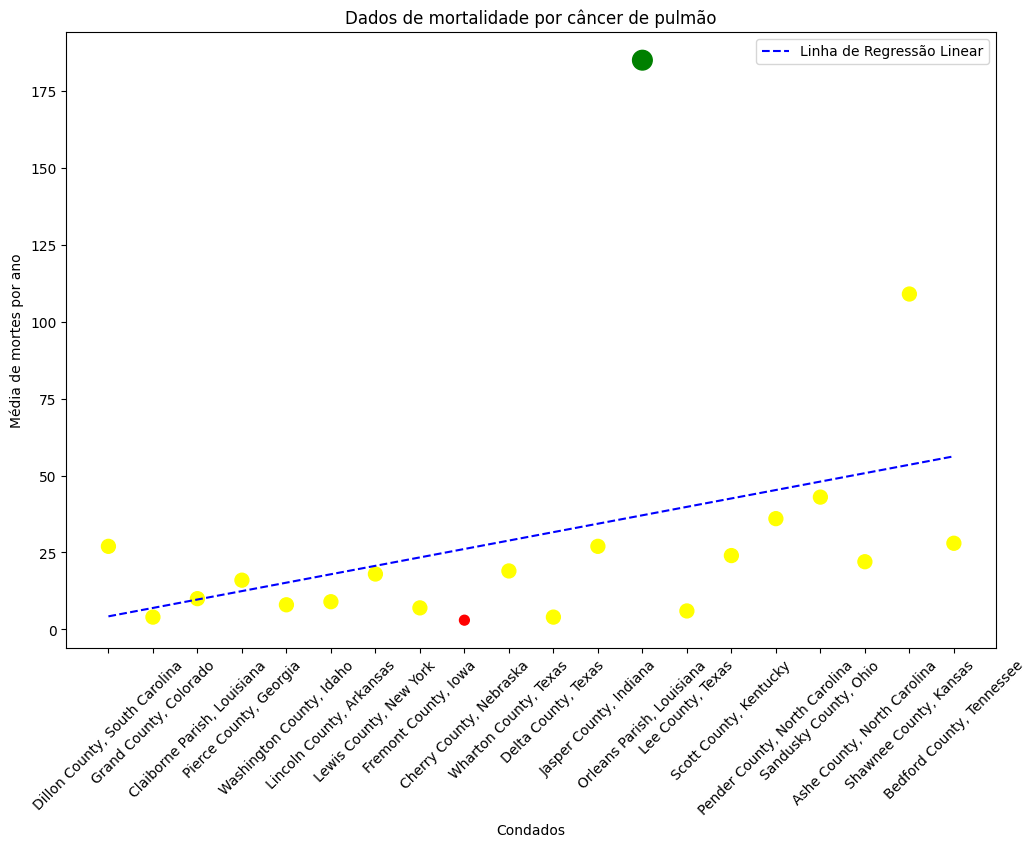

In [89]:
# Selecionando mais de 20 condados aleatórios
random_counties = dados['county'].sample(n=30, random_state=42).tolist()

# Filtrando os dados para esses condados selecionados
dados_filtrados = dados[dados['county'].isin(random_counties)].copy()

# Convertendo erros para NaN e depois removendo NaN
dados_filtrados['average_deaths_per_year'] = pd.to_numeric(dados_filtrados['average_deaths_per_year'], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=['average_deaths_per_year'])

# Garantindo que temos exatamente 20 condados com dados válidos
dados_filtrados = dados_filtrados.sample(n=20, random_state=42)

# Chamando as colunas
counties = dados_filtrados['county']
average_deaths = dados_filtrados['average_deaths_per_year'].values

# Definindo cores e tamanhos
min_value = average_deaths.min()
max_value = average_deaths.max()
colors = ['red' if value == min_value else 'green' if value == max_value else 'yellow' for value in average_deaths]
sizes = [50 if value == min_value else 200 if value == max_value else 100 for value in average_deaths]

# Deixando o eixo x numérico sequencial
x_values = range(len(counties))

# Fazendo a linha de regressão linear
coefficients = np.polyfit(x_values, average_deaths, 1)
trendline = np.polyval(coefficients, x_values)

# Gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x_values, average_deaths, c=colors, s=sizes)
plt.plot(x_values, trendline, color='blue', linestyle='--', label='Linha de Regressão Linear')

# Fazendo os estados ficar em 45°
plt.xticks(x_values, counties, rotation=45)

# Título e rótulos
plt.title('Dados de mortalidade por câncer de pulmão')
plt.xlabel('Condados')
plt.ylabel('Média de mortes por ano')

# Legenda
plt.legend()

plt.show()

#QUADRATIC

Usamos os dados da coluna 'upper_95_confidence_interval_for_trend' para exibir o intervalo de confiança superior a 95 para tendência em 20 estados aleatórios

o codigo abaixo é em python, feito para criar um grafico no modelo quadratic

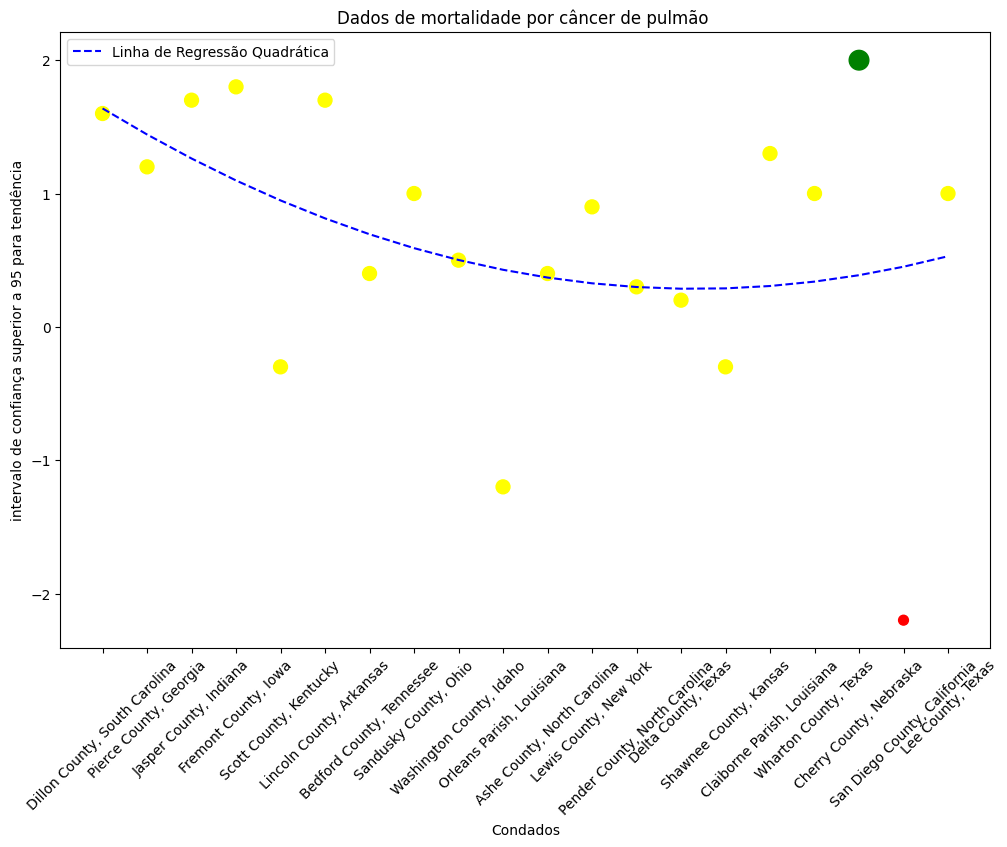

In [88]:
# Selecionando mais de 20 condados aleatórios
random_counties = dados['county'].sample(n=30, random_state=42).tolist()

dados_filtrados = dados[dados['county'].isin(random_counties)].copy()

# Convertendo erros para NaN e depois removendo NaN
dados_filtrados['upper_95_confidence_interval_for_trend'] = pd.to_numeric(dados_filtrados['upper_95_confidence_interval_for_trend'], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=['upper_95_confidence_interval_for_trend'])

# Chamando as colunas
counties = dados_filtrados['county']
upper_confidence = dados_filtrados['upper_95_confidence_interval_for_trend'].values

# Definindo cores e tamanhos
min_value = upper_confidence.min()
max_value = upper_confidence.max()
colors = ['red' if value == min_value else 'green' if value == max_value else 'yellow' for value in upper_confidence]
sizes = [50 if value == min_value else 200 if value == max_value else 100 for value in upper_confidence]

# Deixando eixo x numérico sequencial começando de 1
x_values = np.arange(1, len(counties) + 1)

# Fazendo a linha de regressão quadrática
coefficients = np.polyfit(x_values, upper_confidence, 2)
trendline = coefficients[0] * x_values**2 + coefficients[1] * x_values + coefficients[2]

# Gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x_values, upper_confidence, c=colors, s=sizes)
plt.plot(x_values, trendline, color='blue', linestyle='--', label='Linha de Regressão Quadrática')

# Fazendo os estados ficar em 45°
plt.xticks(x_values, counties, rotation=45)

# Título e rótulos
plt.title('Dados de mortalidade por câncer de pulmão ')
plt.xlabel('Condados')
plt.ylabel('intervalo de confiança superior a 95 para tendência')

# Legenda
plt.legend()

plt.show()

#LOGARITHMIC

Usamos os dados da coluna 'lower_95_confidence_interval_for_trend' para exibir o intervalo de confiança inferior a 95 para tendência em 20 estados aleatórios

o codigo abaixo é em python, feito para criar um grafico no modelo logarithmic

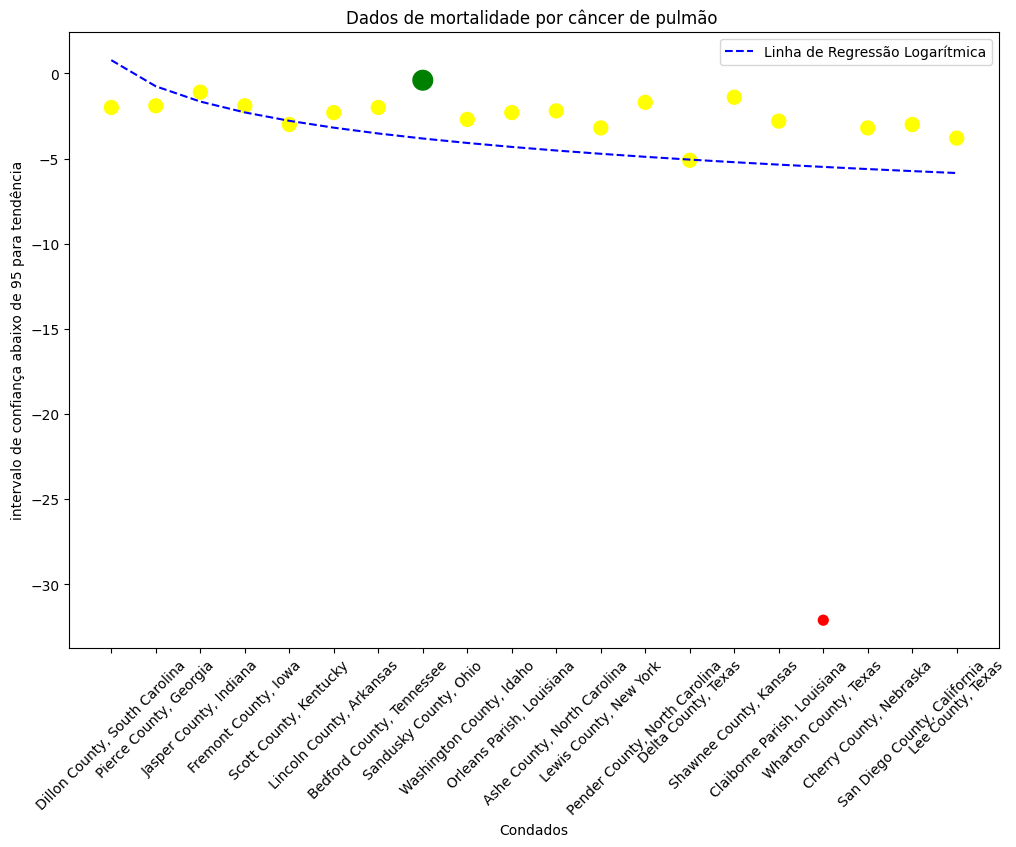

In [87]:
# Selecionando mais de 20 condados aleatórios
random_counties = dados['county'].sample(n=30, random_state=42).tolist()

dados_filtrados = dados[dados['county'].isin(random_counties)].copy()

# Convertendo erros para NaN e depois removendo NaN
dados_filtrados['lower_95_confidence_interval_for_trend'] = pd.to_numeric(dados_filtrados['lower_95_confidence_interval_for_trend'], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=['lower_95_confidence_interval_for_trend'])

# Chamando as colunas
counties = dados_filtrados['county']
lower_confidence = dados_filtrados['lower_95_confidence_interval_for_trend'].values

# Definindo cores e tamanhos
min_value = lower_confidence.min()
max_value = lower_confidence.max()
colors = ['red' if value == min_value else 'green' if value == max_value else 'yellow' for value in lower_confidence]
sizes = [50 if value == min_value else 200 if value == max_value else 100 for value in lower_confidence]

# Deixando eixo x numérico sequencial começando de 1
x_values = np.arange(1, len(counties) + 1)

# Aplicar logaritmo natural aos valores de x para a regressão logarítmica
log_x_values = np.log(x_values)

# Fazendo a linha de regressão logarítmica
coefficients = np.polyfit(log_x_values, lower_confidence, 1)
trendline = np.polyval(coefficients, log_x_values)

# Gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x_values, lower_confidence, c=colors, s=sizes)
plt.plot(x_values, trendline, color='blue', linestyle='--', label='Linha de Regressão Logarítmica')

# Fazendo os estados ficar em 45°
plt.xticks(x_values, counties, rotation=45)

# Título e rótulos
plt.title('Dados de mortalidade por câncer de pulmão ')
plt.xlabel('Condados')
plt.ylabel('intervalo de confiança abaixo de 95 para tendência')

# ALegenda
plt.legend()


plt.show()

#EXPONENTIAL

Usamos os dados da coluna 'upper_95_confidence_interval_for_death_rate' para exibir o intervalo de confiança superior a 95 para taxa de mortalidade em 20 estados aleatórios

o codigo abaixo é em python, feito para criar um grafico no modelo exponential

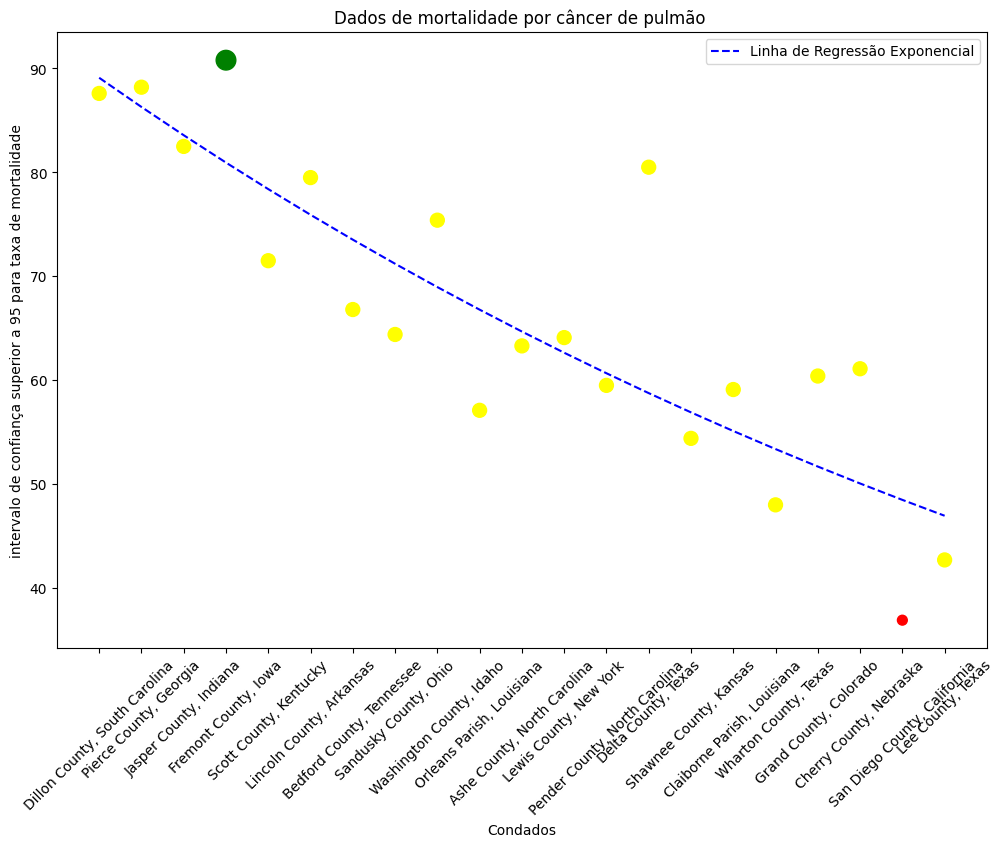

In [82]:
# Selecionando mais de 20 condados aleatórios
random_counties = dados['county'].sample(n=30, random_state=42).tolist()

dados_filtrados = dados[dados['county'].isin(random_counties)].copy()

# Convertendo erros para NaN e depois removendo NaN
dados_filtrados['upper_95_confidence_interval_for_death_rate'] = pd.to_numeric(dados_filtrados['upper_95_confidence_interval_for_death_rate'], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=['upper_95_confidence_interval_for_death_rate'])

# Chamando as colunas
counties = dados_filtrados['county']
upper_death = dados_filtrados['upper_95_confidence_interval_for_death_rate'].values

# Definindo cores e tamanhos
min_value = upper_death.min()
max_value = upper_death.max()
colors = ['red' if value == min_value else 'green' if value == max_value else 'yellow' for value in upper_death]
sizes = [50 if value == min_value else 200 if value == max_value else 100 for value in upper_death]

# Deixando um eixo x numérico sequencial começando de 1
x_values = np.arange(1, len(counties) + 1)

# Fazendo a linha de regressão exponencial
coefficients = np.polyfit(x_values, np.log(upper_death), 1)
trendline = np.exp(coefficients[1]) * np.exp(coefficients[0] * x_values)

# Gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x_values, upper_death, c=colors, s=sizes)
plt.plot(x_values, trendline, color='blue', linestyle='--', label='Linha de Regressão Exponencial')

# Fazendo os estados ficar em 45°
plt.xticks(x_values, counties, rotation=45)

# Título e rótulos
plt.title('Dados de mortalidade por câncer de pulmão ')
plt.xlabel('Condados')
plt.ylabel('intervalo de confiança superior a 95 para taxa de mortalidade')

# Legenda
plt.legend()


plt.show()

#LOESS

Usamos os dados da coluna 'lower_95_confidence_interval_for_death_rate' para exibir o intervalo de confiança inferior a 95 para taxa de mortalidade em 20 estados aleatórios

o codigo abaixo é em python, feito para criar um grafico no modelo loess

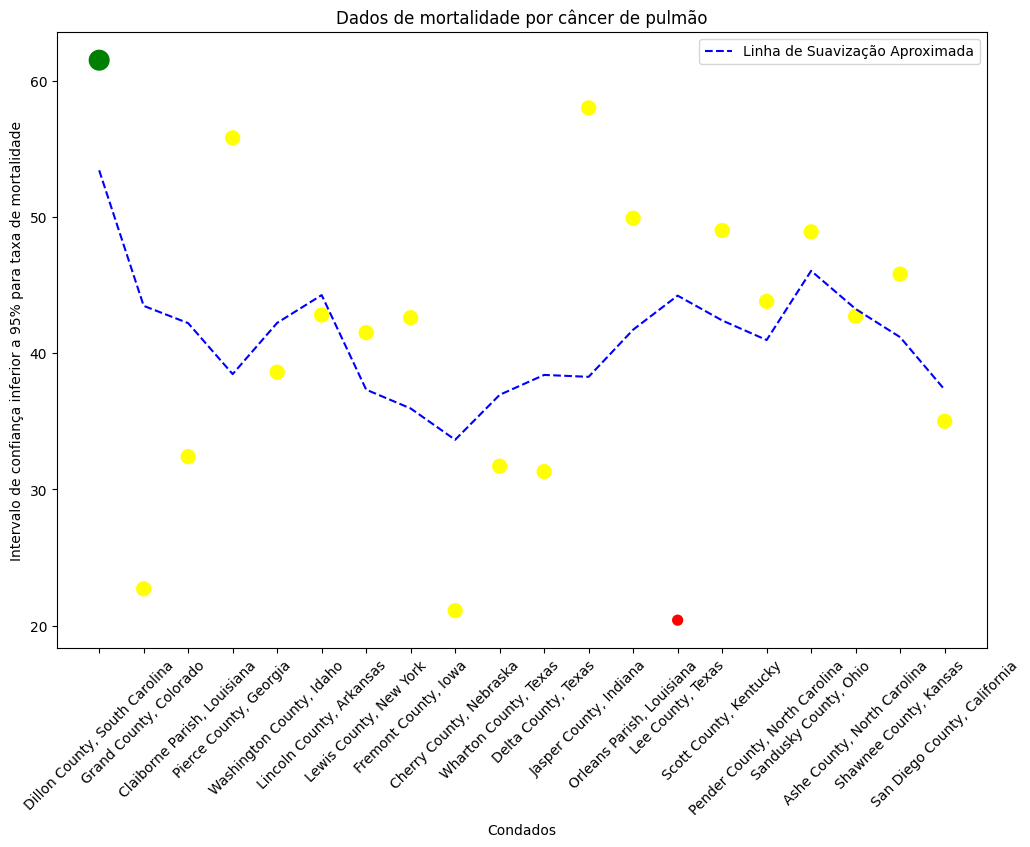

In [83]:
# Selecionando mais de 20 condados aleatórios
random_counties = dados['county'].sample(n=30, random_state=42).tolist()

dados_filtrados = dados[dados['county'].isin(random_counties)].copy()

# Convertendo erros para NaN e depois removendo NaN
dados_filtrados['lower_95_confidence_interval_for_death_rate'] = pd.to_numeric(dados_filtrados['lower_95_confidence_interval_for_death_rate'], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=['lower_95_confidence_interval_for_death_rate'])

# Garantindo 20 condados com dados válidos
dados_filtrados = dados_filtrados.sample(n=20, random_state=42)

# Chamando as colunas
counties = dados_filtrados['county']
lower_death = dados_filtrados['lower_95_confidence_interval_for_death_rate'].values

# Definindo cores e tamanhos
min_value = lower_death.min()
max_value = lower_death.max()
colors = ['red' if value == min_value else 'green' if value == max_value else 'yellow' for value in lower_death]
sizes = [50 if value == min_value else 200 if value == max_value else 100 for value in lower_death]

# Fazendo eixo x numérico sequencial começando de 1
x_values = np.arange(1, len(counties) + 1)

# Aplicando regressão linear em pequenas janelas para simular LOESS
window_size = 5
smoothed_values = []

for i in range(len(x_values)):
    start = max(0, i - window_size // 2)
    end = min(len(x_values), i + window_size // 2 + 1)
    x_window = x_values[start:end].reshape(-1, 1)
    y_window = lower_death[start:end]

    model = LinearRegression()
    model.fit(x_window, y_window)
    smoothed_values.append(model.predict([[x_values[i]]])[0])

# Gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x_values, lower_death, c=colors, s=sizes)
plt.plot(x_values, smoothed_values, color='blue', linestyle='--', label='Linha de Suavização Aproximada')

# Fazendo os estados ficar em 45°
plt.xticks(x_values, counties, rotation=45)

# Título e rótulos
plt.title('Dados de mortalidade por câncer de pulmão')
plt.xlabel('Condados')
plt.ylabel('Intervalo de confiança inferior a 95% para taxa de mortalidade')

# Legenda
plt.legend()


plt.show()

#LINEAR NO SLOPE

Usamos os dados da coluna 'age_adjusted_death_rate' para exibir a taxa de mortalidade ajustada por idade de 20 estados aleatórios

o codigo abaixo é em python, feito para criar um grafico no modelo linear no slope

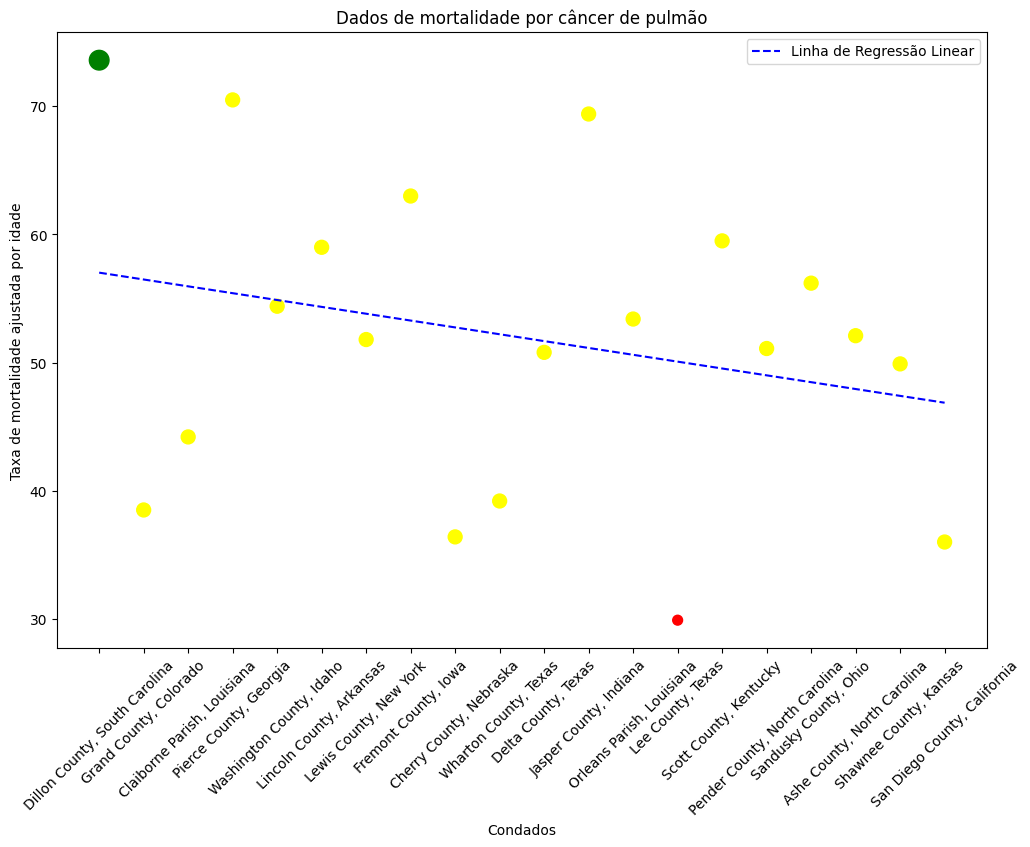

In [84]:
# Selecionando mais de 20 condados aleatórios
random_counties = dados['county'].sample(n=30, random_state=42).tolist()

# Filtrando os dados para esses condados selecionados
dados_filtrados = dados[dados['county'].isin(random_counties)].copy()

# Convertendo erros para NaN e depois removendo NaN
dados_filtrados['age_adjusted_death_rate'] = pd.to_numeric(dados_filtrados['age_adjusted_death_rate'], errors='coerce')
dados_filtrados = dados_filtrados.dropna(subset=['age_adjusted_death_rate'])

# Garantindo que temos exatamente 20 condados com dados válidos
dados_filtrados = dados_filtrados.sample(n=20, random_state=42)

# Chamando as colunas
counties = dados_filtrados['county']
age_adjusted = dados_filtrados['age_adjusted_death_rate'].values

# Definindo cores e tamanhos
min_value = age_adjusted.min()
max_value = age_adjusted.max()
colors = ['red' if value == min_value else 'green' if value == max_value else 'yellow' for value in age_adjusted]
sizes = [50 if value == min_value else 200 if value == max_value else 100 for value in age_adjusted]

# Deixando o eixo x numérico sequencial começando de 1
x_values = np.arange(1, len(counties) + 1).reshape(-1, 1)

# Fazendo a linha de regressão linear
model = LinearRegression()
model.fit(x_values, age_adjusted)
trendline = model.predict(x_values)

# Gráfico
plt.figure(figsize=(12, 8))
plt.scatter(x_values, age_adjusted, c=colors, s=sizes)
plt.plot(x_values, trendline, color='blue', linestyle='--', label='Linha de Regressão Linear')

# Fazendo os estados ficar em 45°
plt.xticks(x_values.flatten(), counties, rotation=45)

# Título e rótulos
plt.title('Dados de mortalidade por câncer de pulmão')
plt.xlabel('Condados')
plt.ylabel('Taxa de mortalidade ajustada por idade')

# Legenda
plt.legend()

plt.show()

#CONCLUSÃO

Escolhemos o modelo de regressão linear de câncer,  e usamos os dados de mortalidade por câncer de pulmão, optamos por diversificar os modelos de graficos abordando em cada um, uma tabela diferente